# Import Data and Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.head())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [9]:
train_data['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

# Clean Data
Drop Potentially Irrelevant Values

In [10]:
del train_data['PassengerId'];
del train_data['Name'];
del train_data['Ticket'];
del train_data['Cabin'];

# del test_data['PassengerId'];
del test_data['Name'];
del test_data['Ticket'];
del test_data['Cabin'];



Fill in NaN with Relevent Parameters

In [12]:
median = train_data["Age"].median()
train_data["Age"].fillna(median, inplace=True) 
test_data["Age"].fillna(median, inplace=True) 

mode=train_data["Sex"].dropna().mode()[0]
train_data["Sex"].fillna(mode, inplace=True) 
test_data["Sex"].fillna(mode, inplace=True) 

mode=train_data["Embarked"].dropna().mode()[0]
train_data["Embarked"].fillna(mode, inplace=True) 
test_data["Embarked"].fillna(mode, inplace=True) 

mode=train_data["Fare"].dropna().median()
train_data["Fare"].fillna(mode, inplace=True) 
test_data["Fare"].fillna(mode, inplace=True) 

mode=train_data["SibSp"].dropna().mode()[0]
train_data["SibSp"].fillna(mode, inplace=True) 
test_data["SibSp"].fillna(mode, inplace=True)

mode=train_data["Parch"].dropna().mode()[0]
train_data["Parch"].fillna(mode, inplace=True) 
test_data["Parch"].fillna(mode, inplace=True)

mode=train_data["Pclass"].dropna().mode()[0]
train_data["Pclass"].fillna(mode, inplace=True) 
test_data["Pclass"].fillna(mode, inplace=True)

Normalize Fare and Age

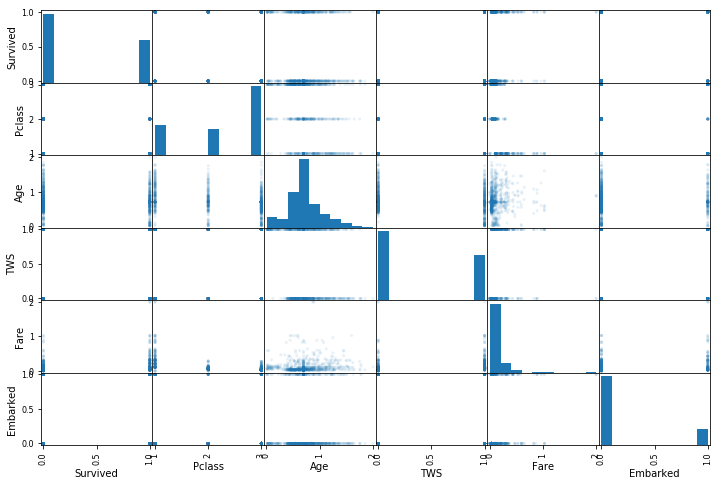

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Pclass","Age","TWS",
              "Fare","Sex","Embarked"]
_ = scatter_matrix(train_data[attributes], figsize=(12, 8),alpha=0.1)

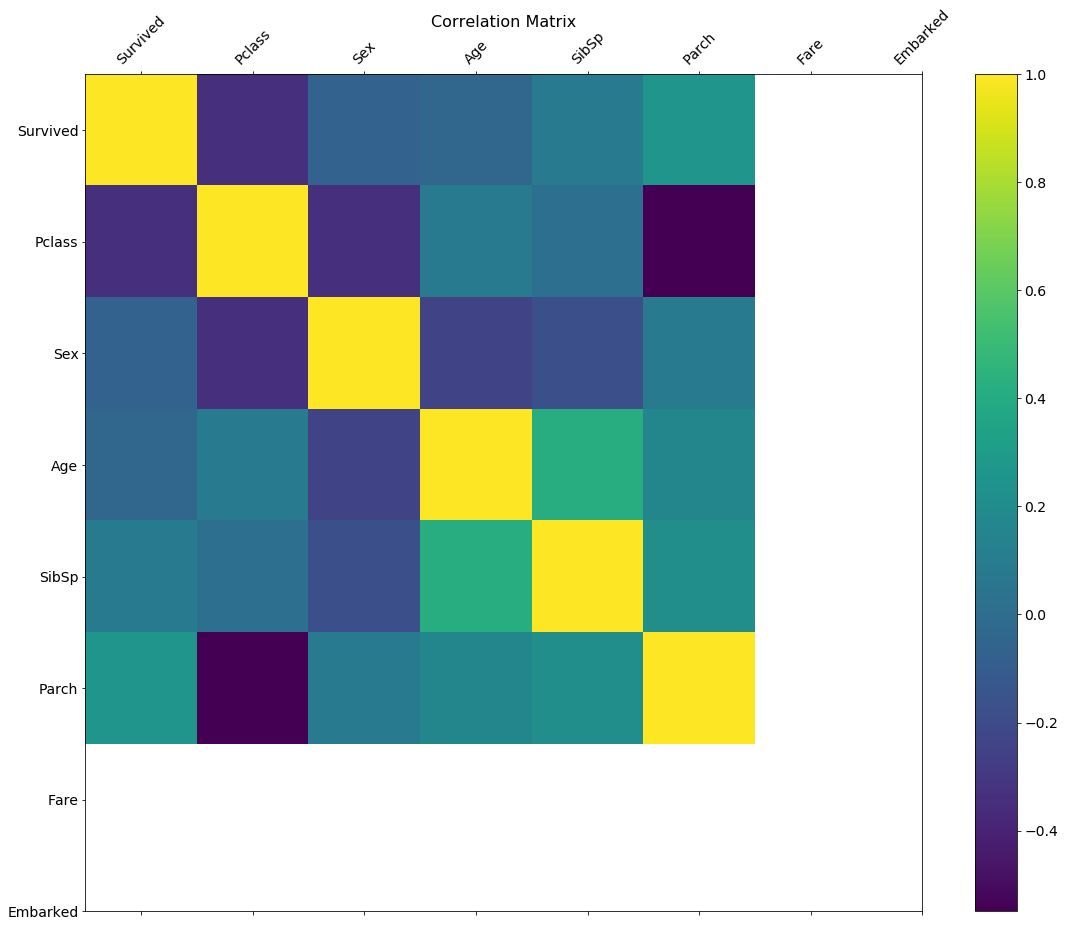

In [13]:
train_data["Fare"]=train_data["Fare"] / max(train_data["Fare"]) * 2
train_data["Age"]=train_data["Age"] / max(train_data["Age"]) * 2

test_data["Fare"]=test_data["Fare"] / max(test_data["Fare"]) * 2
test_data["Age"]=test_data["Age"] / max(test_data["Age"]) * 2



Convert Categorical to Numerical

In [14]:
from sklearn.preprocessing import OneHotEncoder

train_data2=train_data;
train_data2.head()

count=0;
for id in train_data2["Sex"]:
    train_data2.Sex[count]=int((id == 'female'))
    count += 1
    
count=0;
for id in test_data["Sex"]:
    test_data.Sex[count]=int((id == 'female'))
    count += 1



"""
count=0;
for id in train_data2["Embarked"]:
    if (id == 'S'):
        train_data2.Embarked[count]=int(0)
    elif (id == 'C'):  
        train_data2.Embarked[count]=int(1)
    elif (id == 'Q'):
        train_data2.Embarked[count]=int(2)
    count += 1
    
count=0;
for id in test_data["Embarked"]:
    if (id == 'S'):
        test_data.Embarked[count]=int(0)
    elif (id == 'C'):  
        test_data.Embarked[count]=int(1)
    elif (id == 'Q'):
        test_data.Embarked[count]=int(2)
    count += 1
"""

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


'\ncount=0;\nfor id in train_data2["Embarked"]:\n    if (id == \'S\'):\n        train_data2.Embarked[count]=int(0)\n    elif (id == \'C\'):  \n        train_data2.Embarked[count]=int(1)\n    elif (id == \'Q\'):\n        train_data2.Embarked[count]=int(2)\n    count += 1\n    \ncount=0;\nfor id in test_data["Embarked"]:\n    if (id == \'S\'):\n        test_data.Embarked[count]=int(0)\n    elif (id == \'C\'):  \n        test_data.Embarked[count]=int(1)\n    elif (id == \'Q\'):\n        test_data.Embarked[count]=int(2)\n    count += 1\n'

In [15]:
cat_encoder = OneHotEncoder(sparse=False)
embark_cat_train=train_data2[["Embarked"]]
embark_cat_test=test_data[["Embarked"]]
embark_cat=pd.concat([embark_cat_train, embark_cat_test], ignore_index=True)
embark_cat_1hot = cat_encoder.fit_transform(embark_cat)
print(len(embark_cat_1hot))
print(len(embark_cat_1hot[0:(len(train_data2))]))
print(len(embark_cat_1hot[(len(train_data2)):len(embark_cat_1hot)]))
train_data2["Embarked"]=embark_cat_1hot[0:(len(train_data2))]
test_data["Embarked"]=embark_cat_1hot[(len(train_data2)):len(embark_cat_1hot)]


1309
891
418


Create new variable replacing Parch and SibSp to Travel With Someone (TWS)

In [16]:
train_data2["TWS"] = ((train_data2["SibSp"]+train_data2["Parch"]) > 0).astype(int)
test_data["TWS"] = ((test_data["SibSp"]+test_data["Parch"]) > 0).astype(int)


del train_data2['SibSp'];
del train_data2['Parch'];

del test_data['SibSp'];
del test_data['Parch'];

In [18]:
X_traindat = train_data2.drop("Survived", axis=1)
print(X_traindat.head())
print(X_traindat.describe())

   Pclass Sex    Age      Fare  Embarked  TWS
0       3   0  0.550  0.028302       0.0    1
1       1   1  0.950  0.278271       1.0    1
2       3   1  0.650  0.030937       0.0    0
3       1   1  0.875  0.207289       0.0    1
4       3   0  0.875  0.031425       0.0    0
           Pclass         Age        Fare    Embarked         TWS
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642    0.734040    0.125717    0.188552    0.397306
std      0.836071    0.325492    0.193990    0.391372    0.489615
min      1.000000    0.010500    0.000000    0.000000    0.000000
25%      2.000000    0.550000    0.030880    0.000000    0.000000
50%      3.000000    0.700000    0.056425    0.000000    0.000000
75%      3.000000    0.875000    0.121016    0.000000    1.000000
max      3.000000    2.000000    2.000000    1.000000    1.000000


# Train and Analyze Models

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-20000, 20000, 0, 1])             # Not shown

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

train_data3=train_data2.astype(float)

#Later Found Dropping Fare Increased Scores
del train_data3['Fare'];
X_traindat = train_data3.drop("Survived", axis=1)
Y_traindat = train_data3["Survived"]


Try and Evaluate Stochastic Gradient Descent

SGD Cross Val Score:  [0.77777778 0.78787879 0.76430976]
***
Confusion Matrix for SGD:
[[442 107]
 [ 92 250]]
***
SGD Precision Score:  0.7002801120448179
***
SGD Recall Score:  0.7309941520467836
***
SGD F1 Score:  0.7153075822603718
***
SGD AUC:  0.8279141234993981


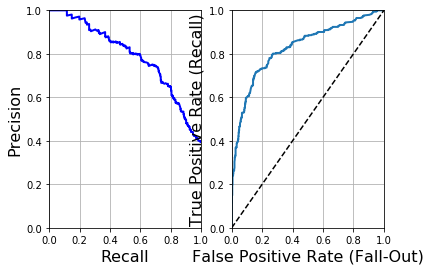

In [20]:
sgdclf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgdclf.fit(X_traindat, Y_traindat)
Y_predsgd=sgdclf.predict(X_traindat)
sgdcvs=cross_val_score(sgdclf, X_traindat, Y_traindat, cv=3, scoring="accuracy")
print("SGD Cross Val Score: ", sgdcvs)
print("***")
y_train_predsgd = cross_val_predict(sgdclf, X_traindat, Y_traindat, cv=3)
print("Confusion Matrix for SGD:")
print(confusion_matrix(Y_traindat, y_train_predsgd))
print("***")
sgdps=precision_score(Y_traindat, y_train_predsgd)
print("SGD Precision Score: ", sgdps)
print("***")
sgdrs=recall_score(Y_traindat, y_train_predsgd)
print("SGD Recall Score: ", sgdrs)
print("***")
sgdf1s=f1_score(Y_traindat, y_train_predsgd)
print("SGD F1 Score: ", sgdf1s)
print("***")
y_sgdscores = cross_val_predict(sgdclf, X_traindat, Y_traindat, cv=3,
                             method="decision_function")
precisionssgd, recallssgd, thresholdssgd = precision_recall_curve(Y_traindat, y_sgdscores)
plt.subplot(121)
plot_precision_vs_recall(precisionssgd, recallssgd)
plt.subplot(122)
fprsgd, tprsgd, thresholdssgd = roc_curve(Y_traindat, y_sgdscores)
plot_roc_curve(fprsgd, tprsgd)
sgdauc=roc_auc_score(Y_traindat, y_sgdscores)
print("SGD AUC: ", sgdauc)
plt.show()

Try and Evaluate Random Forest

RF Cross Val Score:  [0.75420875 0.79124579 0.74074074]
***
Confusion Matrix for RF:
[[442 107]
 [105 237]]
***
RF Precision Score:  0.688953488372093
***
RF Recall Score:  0.6929824561403509
***
RF F1 Score:  0.6909620991253644
***
RF AUC:  0.8146923167055466


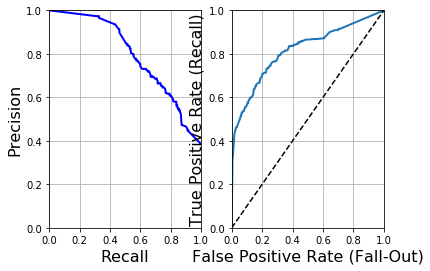

In [21]:
rfclf = RandomForestClassifier(n_estimators=20, random_state=42)
rfclf.fit(X_traindat, Y_traindat)
Y_predrf = rfclf.predict(X_traindat)
rfcvs=cross_val_score(rfclf, X_traindat, Y_traindat, cv=3, scoring="accuracy")
print("RF Cross Val Score: ", rfcvs)
print("***")
y_train_predrf = cross_val_predict(rfclf, X_traindat, Y_traindat, cv=3)
print("Confusion Matrix for RF:")
print(confusion_matrix(Y_traindat, y_train_predrf))
print("***")
rfps=precision_score(Y_traindat, y_train_predrf)
print("RF Precision Score: ", rfps)
print("***")
rfrs=recall_score(Y_traindat, y_train_predrf)
print("RF Recall Score: ", rfrs)
print("***")
rff1s=f1_score(Y_traindat, y_train_predrf)
print("RF F1 Score: ", rff1s)
print("***")
y_rfscores = cross_val_predict(rfclf, X_traindat, Y_traindat, cv=3,
                             method="predict_proba")
y_rfscores = y_rfscores[:, 1]
precisionsrf, recallsrf, thresholdsrf = precision_recall_curve(Y_traindat, y_rfscores)
plt.subplot(121)
plot_precision_vs_recall(precisionsrf, recallsrf)
plt.subplot(122)
fprrf, tprrf, thresholdsrf = roc_curve(Y_traindat, y_rfscores)
plot_roc_curve(fprrf, tprrf)
rfauc=roc_auc_score(Y_traindat, y_rfscores)
print("RF AUC: ", rfauc)
plt.show()

Try and Evaluate Descision Tree

DT Cross Val Score:  [0.74747475 0.78787879 0.77441077]
***
Confusion Matrix for DT:
[[471  78]
 [126 216]]
***
DT Precision Score:  0.7346938775510204
***
DT Recall Score:  0.631578947368421
***
DT F1 Score:  0.6792452830188679
***
DT AUC:  0.745163987686277


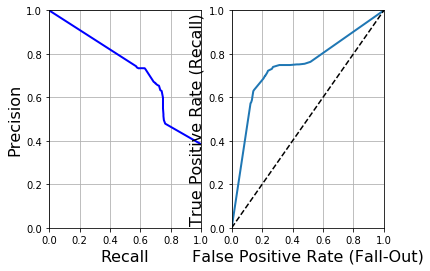

In [22]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_traindat, Y_traindat)
Y_preddt = dtclf.predict(X_traindat)
dtcvs=cross_val_score(dtclf, X_traindat, Y_traindat, cv=3, scoring="accuracy")
print("DT Cross Val Score: ", dtcvs)
print("***")
y_train_preddt = cross_val_predict(dtclf, X_traindat, Y_traindat, cv=3)
print("Confusion Matrix for DT:")
print(confusion_matrix(Y_traindat, y_train_preddt))
print("***")
dtps=precision_score(Y_traindat, y_train_preddt)
print("DT Precision Score: ", dtps)
print("***")
dtrs=recall_score(Y_traindat, y_train_preddt)
print("DT Recall Score: ", dtrs)
print("***")
dtf1s=f1_score(Y_traindat, y_train_preddt)
print("DT F1 Score: ", dtf1s)
print("***")
y_dtscores = cross_val_predict(dtclf, X_traindat, Y_traindat, cv=3,
                             method="predict_proba")
y_dtscores = y_dtscores[:, 1]
precisionsdt, recallsdt, thresholddt = precision_recall_curve(Y_traindat, y_dtscores)
plt.subplot(121)
plot_precision_vs_recall(precisionsdt, recallsdt)
plt.subplot(122)
fprdt, tprdt, thresholdsdt = roc_curve(Y_traindat, y_dtscores)
plot_roc_curve(fprdt, tprdt)
dtauc=roc_auc_score(Y_traindat, y_dtscores)
print("DT AUC: ", dtauc)
plt.show()

Try and Evaluate K Nearest Neighbors

KNN Cross Val Score:  [0.76094276 0.81481481 0.76430976]
***
Confusion Matrix for KNN:
[[472  77]
 [119 223]]
***
KNN Precision Score:  0.7433333333333333
***
KNN Recall Score:  0.652046783625731
***
KNN F1 Score:  0.6947040498442367
***
KNN AUC:  0.8206947240596939


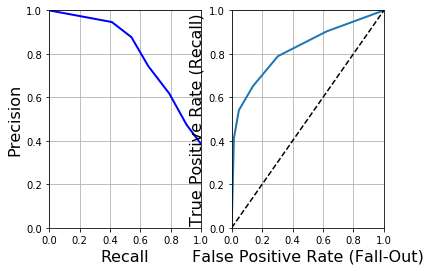

In [23]:
knnclf = KNeighborsClassifier(n_neighbors = 5)
knnclf.fit(X_traindat, Y_traindat)
Y_predknn = knnclf.predict(X_traindat)
knncvs=cross_val_score(knnclf, X_traindat, Y_traindat, cv=3, scoring="accuracy")
print("KNN Cross Val Score: ", knncvs)
print("***")
y_train_predknn = cross_val_predict(knnclf, X_traindat, Y_traindat, cv=3)
print("Confusion Matrix for KNN:")
print(confusion_matrix(Y_traindat, y_train_predknn))
print("***")
knnps=precision_score(Y_traindat, y_train_predknn)
print("KNN Precision Score: ", knnps)
print("***")
knnrs=recall_score(Y_traindat, y_train_predknn)
print("KNN Recall Score: ", knnrs)
print("***")
knnf1s=f1_score(Y_traindat, y_train_predknn)
print("KNN F1 Score: ", knnf1s)
print("***")
y_knnscores = cross_val_predict(knnclf, X_traindat, Y_traindat, cv=3,
                             method="predict_proba")
y_knnscores = y_knnscores[:, 1]
precisionsknn, recallsknn, thresholdknn = precision_recall_curve(Y_traindat, y_knnscores)
plt.subplot(121)
plot_precision_vs_recall(precisionsknn, recallsknn)
plt.subplot(122)
fprknn, tprknn, thresholdsknn = roc_curve(Y_traindat, y_knnscores)
plot_roc_curve(fprknn, tprknn)
knnauc=roc_auc_score(Y_traindat, y_knnscores)
print("KNN AUC: ", knnauc)
plt.show()

Try and Evaluate Support Vector Machine

SVM Cross Val Score:  [0.76094276 0.80808081 0.77104377]
***
Confusion Matrix for SVM:
[[495  54]
 [129 213]]
***
SVM Precision Score:  0.797752808988764
***
SVM Recall Score:  0.6228070175438597
***
SVM F1 Score:  0.6947040498442367
***
SVM AUC:  0.8194830579788877


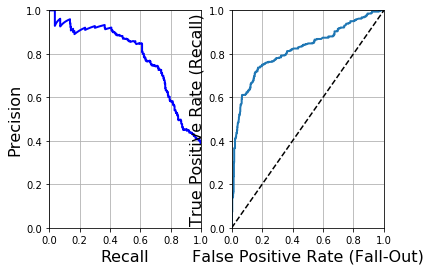

In [24]:
svmclf = SVC(gamma="auto", random_state=42, probability=True)
svmclf.fit(X_traindat, Y_traindat)
Y_predsvm = svmclf.predict(X_traindat)
svmcvs=cross_val_score(svmclf, X_traindat, Y_traindat, cv=3, scoring="accuracy")
print("SVM Cross Val Score: ", svmcvs)
print("***")
y_train_predsvm = cross_val_predict(svmclf, X_traindat, Y_traindat, cv=10)
print("Confusion Matrix for SVM:")
print(confusion_matrix(Y_traindat, y_train_predsvm))
print("***")
svmps=precision_score(Y_traindat, y_train_predsvm)
print("SVM Precision Score: ", svmps)
print("***")
svmrs=recall_score(Y_traindat, y_train_predsvm)
print("SVM Recall Score: ", svmrs)
print("***")
svmf1s=f1_score(Y_traindat, y_train_predknn)
print("SVM F1 Score: ", svmf1s)
print("***")
y_svmscores = cross_val_predict(svmclf, X_traindat, Y_traindat, cv=10,
                             method="predict_proba")
y_svmscores = y_svmscores[:, 1]
precisionssvm, recallssvm, thresholdsvm = precision_recall_curve(Y_traindat, y_svmscores)
plt.subplot(121)
plot_precision_vs_recall(precisionssvm, recallssvm)
plt.subplot(122)
fprsvm, tprsvm, thresholdssvm = roc_curve(Y_traindat, y_svmscores)
plot_roc_curve(fprsvm, tprsvm)
svmauc=roc_auc_score(Y_traindat, y_svmscores)
print("SVM AUC: ", svmauc)
plt.show()

Compare Models

In [25]:
def mean(cvs):
    return sum(cvs) / len(cvs) 

modelscores=pd.DataFrame({'Model':['SGD', 'RF', 'DT', 'KNN' , 'SVM'],
                          'Mean CV':[mean(sgdcvs),mean(rfcvs),mean(dtcvs),mean(knncvs),mean(svmcvs)],
                          'F1':[sgdf1s,rff1s,dtf1s,knnf1s,svmf1s],
                          'AUC':[sgdauc,rfauc,dtauc,knnauc,svmauc]})

print(modelscores.sort_values('Mean CV', ascending=False))

  Model   Mean CV        F1       AUC
3   KNN  0.780022  0.694704  0.820695
4   SVM  0.780022  0.694704  0.819483
0   SGD  0.776655  0.715308  0.827914
2    DT  0.769921  0.679245  0.745164
1    RF  0.762065  0.690962  0.814692


# Run Models On Test Set

In [26]:
X_traindat = test_data.drop("PassengerId", axis=1)
X_traindat = X_traindat.drop("Fare", axis=1)

Y_predsvm = svmclf.predict(X_traindat)
pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':Y_predsvm}).astype(int).to_csv('KA_Titanic_Submission_SVM.csv',index=False)

Y_predsgd = sgdclf.predict(X_traindat)
pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':Y_predsgd}).astype(int).to_csv('KA_Titanic_Submission_SGD.csv',index=False)

Y_predknn = knnclf.predict(X_traindat)
pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':Y_predknn}).astype(int).to_csv('KA_Titanic_Submission_KNN.csv',index=False)

Y_preddt = dtclf.predict(X_traindat)
pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':Y_preddt}).astype(int).to_csv('KA_Titanic_Submission_DT.csv',index=False)

Y_predrf = rfclf.predict(X_traindat)
pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':Y_predrf}).astype(int).to_csv('KA_Titanic_Submission_RF.csv',index=False)